In [1]:
# TRR- after transplant
# TCR - at registration


# contain = 'R'
# complete = [col for col in df.columns if contain in col.upper() and col not in completeCols]

# # update
# completeCols.update(complete)

# # display
# complete


# df[complete].describe(include='all').T
# df[complete].isna().sum()
# df[complete].nunique()

# # remove column
# dropCols = ['LT_ONE_WEEK_DON']

# # remove column
# df.drop(columns = dropCols, inplace = True)

# complete = ['LV_EJECT_METH']
# # convert to float & maintain NaN
# df[complete] = df[complete].astype('Int64')
# # convert to object
# df[complete] = df[complete].astype('object')
# # replace NaN values with 'U'
# df[complete] = df[complete].fillna('U')
# # convert str to category data type
# df[complete] = df[complete].astype('category')


# # update set
# completeCols.update(['LV_EJECT_METH_DON','LV_EJECT_DON'])

# # renaming column
# df.rename(columns={'LV_EJECT_METH': 'LV_EJECT_METH_DON', 'LV_EJECT': 'LV_EJECT_DON'}, inplace=True)


# # lets use median for all the nulls
# df['LV_EJECT'] = df['LV_EJECT'].fillna(df['LV_EJECT'].median())

# # count plot
# plotCount(complete, width=20, height=10)

# # ISCHTIME histogram
# plt.hist(df['ISCHTIME'], bins=30)
# plt.xlabel('ISCHTIME')
# plt.ylabel('Frequency')
# plt.title('Histogram of Donor ISCHTIME')
# plt.show()

# # boxplot
# plotBox(complete, width=18, height=12)


# # box plot
# plotBox(complete)

# # list of all donor & heart features
# donorfeature = donor_data.featureName.values
# heartCols = df_heart.columns.values

# # set operation to determine intersection
# intersectionDonor = set(donorfeature) & set(heartCols)

# # initialized variables
# prefix   = 'D_'
# dictColD = dict()
# # iterate 
# for value in intersectionDonor:
#     k = value
#     v = prefix + value
#     # insert
#     dictColD[k] = v

# # rename columns for donor
# df_heart.rename(columns=dictColD, inplace=True)

# # display
# df_heart.head()

In [2]:
# colsUnknow = ['INO_PROCURE_AGENT_1', 'ACTIVATE_DATE', 'LAST_INACT_REASON', 'LASTFUNO']
# y_values = ['GSTATUS', 'GRF_STAT', 'PTIME', 'PSTATUS', 'GTIME', 'ACUTE_REJ_EPI', 'LASTFUNO']

In [3]:
# set(df.columns.values).difference(completeCols)
# # create a boolean mask where WGT_KG_DON_CALC and BMI_DON_CALC are not equal
# mask = df_heart['WGT_KG_DON_CALC'] != df_heart['BMI_DON_CALC']

# # mask to filter the DataFrame
# result = df_heart[mask]

# # display
# result[['WGT_KG_DON_CALC', 'BMI_DON_CALC']].sample(10)

# # set to max
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)


# # set to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

### Iterative imputation
IterativeImputer can be more robust to outliers than other specific imputation methods, such as mean or median imputation, because it models each feature with missing values as a function of different features. This modeling approach allows IterativeImputer to capture more complex relationships in the data and mitigate the influence of outliers.

In [4]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# # Assuming df is your DataFrame with missing values
# # and features_to_impute is a list of column names with missing values
# features_to_impute = ['feature1', 'feature2', 'feature3']

# # Initialize the imputer
# imputer = IterativeImputer(max_iter=10, random_state=0)

# # Fit and transform the data
# df_imputed = df.copy()  # Create a copy to avoid modifying the original DataFrame
# df_imputed[features_to_impute] = imputer.fit_transform(df[features_to_impute])

# set to max
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# set to default
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

# df_main.columns[df_main.columns.str.startswith('L')]

In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# set seaborn theme
sns.set_theme()

# print version
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.1
Seaborn Version: 0.12.2
Python Version: 3.11.9


In [2]:
# import pickle dataset
df = pd.read_pickle("../Data/cleanDF.pkl")

In [3]:
# display dataframe infomation
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                Categories                                       │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━━━┓                              │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables   ┃                              │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━━━┩                              │
│ │ Number of rows    │ 27494  │ │ category    │ 174   │ │ THORACIC_DGN            │                              │
│ │ Number of columns │ 281    │ │ float64     │ 62    │ │ GENDER                  │                              │
│ └───────────────────┴────────┘ │ int64       │ 28    │ │ ABO                     │                              │
│                                │ string      │ 17    │ │ CITIZENSHIP             │                              │
│                                └─────────────┴───────┘ │ PERM_STATE              │                              │
│                                                        │ EDUCATION               │                              │
│                                                        │ ECMO_TCR                │                              │
│                                                        │ IABP_TCR                │                              │
│                                                        │ INOTROPES_TCR           │                              │
│                                                        │ PGE_TCR                 │                              │
│                                                        │ OTH_LIFE_SUP_TCR        │                              │
│                                                        │ VAD_DEVICE_TY_TCR       │                              │
│                                                        │ FUNC_STAT_TCR           │                              │
│                                                        │ PRI_PAYMENT_TCR         │                              │
│                                                        │ DIAB                    │                              │
│                                                        │ DIAL_TY_TCR             │                              │
│                                                        │ CEREB_VASC              │                              │
│                                                        │ MALIG_TCR               │                              │
│                                                        │ IMPL_DEFIBRIL           │                              │
│                                                        │ INOTROP_VASO_SYS_TCR    │                              │
│                                                        │ INOTROP_VASO_DIA_TCR    │                              │
│                                                        │ INOTROP_VASO_MN_TCR     │                              │
│                                                        │ INOTROP_VASO_PCW_TCR    │                              │
│                                                        │ INOTROP_VASO_CO_TCR     │                              │
│                                                        │ CIG_USE                 │                              │
│                                                        │ TCR_DUR_ABSTAIN         │                              │
│                                                        │ PRIOR_CARD_SURG_TCR     │                              │
│                                                        │ LAST_INACT_REASON       │                              │
│                                                        │ INIT_STAT               │                              │
│                                                       

### Create Data Dictionary

In [4]:
# import Column description
colDef = pd.read_csv("../data/thoraticColumnNames.csv")

# current columns array
dfColumns = pd.DataFrame(np.sort(df.columns.values), columns= ['featureName'])

In [5]:
# display head
colDef.sample(10)

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
370,PRAPK_CL1,RECIPIENT PEAK PRA% CLASS I @ TRANSPLANT,RH,2004-06-30 00:00:00,2015-03-31 00:00:00,RECIPIENT HLA TYPING,NUM,TRR RECIPIENT PEAK PRA% CLASS I,Unknown
144,DR53,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown
524,VESSELS_50STEN,"DECEASED DONOR CORONARY ANGIOGRAM: IF YES NORMAL: # VESSELS WITH > 50% STENOSIS 1,2 OR 3",DDR,1999-10-25 00:00:00,Unknown,HEART DONOR'S CARDIAC FUNCTION,NUM,"DON IF ABNORMAL, # OF VESSELS WITH > 50% STENOSIS",Unknown
77,CONTIN_CIG_DON,DECEASED DONOR-HISTORY OF CIGARETTES IN PAST@ >20PACK YRS+RECENT 6MO USE,DDR,1994-04-01 00:00:00,Unknown,DONOR HISTORY,CHAR,DDR CONTINUED CIGARETTE USE,Unknown
220,HEMO_SYS_TCR,MOST RECENT HEMODYNAMICS PA (SYS) MM/HG @ REGISTRATION,TCR,1994-04-01 00:00:00,Unknown,CLINICAL INFORMATION,NUM,TCR PA(SYS) MM/HG,BOTH BEST AND BASELINE COLLECTED BETWEEN 04/01/1994 AND 10/25/1999. AFTER 10/25/1999 ONE VALUE COLLECTED.
78,CONTIN_CIG_OLD,CIGARETTE USE > 10 PACK YRS AND CONINUED USE DURING LAST SIX MONTHS,TCR,1999-10-25 00:00:00,2004-06-30 00:00:00,HEART/LUNG MEDICAL FACTORS,CHAR,TCR CIGARETTE USE > 10 PACK YRS AND CONTINUED USE DURING LAST 6 MONTHS AT LISTING (PRE 6/30/2004),Unknown
72,COD3,RECIPIENT CONTRIBUTORY CAUSE OF DEATH 2,TRF/TRR,2004-06-30 00:00:00,Unknown,PATIENT STATUS,NUM,TRR/TRF CONTRIBUTARY CAUSE OF DEATH:2,Unknown
452,SYST_PA_CATH_INIT_DON,DDR PA CATHETER INIT (MM/HG),DDR,2004-06-30 00:00:00,Unknown,ORGAN RECOVERY,NUM,DDR PA CATHETER INIT (MM/HG),Unknown
467,THORACOT_RT_OLD,CANDIDATE THORACOTOMY RIGHT AT LISTING,TCR,Unknown,2004-06-30 00:00:00,HEART/LUNG MEDICAL FACTORS,CHAR,TCR THORACOTOMY RIGHT AT LISTING (PRE 6/30/2004),Unknown
192,GSTATUS,GRAFT FAILED (1=YES),CALCULATED,Unknown,Unknown,Unknown,NUM,"BOOLEAN: PAT_STAT IN(""D"",""R"")",Unknown


In [6]:
# display
dfColumns.sample(10)

,featureName
179,MALIG
96,ETHCAT
123,HEMO_PA_DIA_TRR
25,CARDARREST_NEURO_DON
276,VENT_SUPPORT_AFTER_LIST
130,HEPARIN_DON
248,STATUS_TCR
206,PRIOR_CARD_SURG_TRR
250,STEROID
0,ABO


In [7]:
# shape of dataframe
dfColumns.shape

(281, 1)

In [8]:
# columns to rename
selectName = ['CARDARREST_NEURO', 'DDR1', 'DDR2', 'DA1', 'DA2', 'DB1', 'DB2', 'HIST_MI', 'LV_EJECT', 'LV_EJECT_METH', 'CPRA', 
              'INIT_BMI_CALC', 'INIT_HGT_CM_CALC', 'INIT_WGT_KG_CALC', 'TATTOOS']

# colDef[colDef['featureName'].isin(selectName)]
colDef[colDef['featureName'].str.contains('|'.join(selectName))]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CARDARREST_NEURO,DECEASED DONOR-CARDIAC ARREST POST BRAIN DEATH,DDR,1999-10-25 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DON CARDIAC ARR. SINCE EVENT THAT LED TO DECL OF DEATH,Unknown
84,CPRA,Recipient Most Recent CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Most Recent CPRA,Unknown
85,CPRA_PEAK,RecipientPeak CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Peak CPRA,Unknown
94,DA1,DONOR A1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A1 ANTIGEN,Unknown
95,DA2,DONOR A2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A2 ANTIGEN,Unknown
110,DB1,DONOR B1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B1 ANTIGEN,Unknown
111,DB2,DONOR B2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B2 ANTIGEN,Unknown
113,DDR1,DONOR DR1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR1 ANTIGEN,Unknown
114,DDR2,DONOR DR2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR2 ANTIGEN,Unknown
235,HIST_MI,DECEASED DONOR HISTORY OF PREVIOUS MI (MYOCARDIAL INFARCTION),DDR,1999-10-25 00:00:00,Unknown,HEART DONOR'S CARDIAC FUNCTION,CHAR,DON HISTORY OF PREVIOUS MI,Unknown


In [9]:
# list column definitions 
dfColumns[dfColumns['featureName'].str.contains('|'.join(selectName))]

,featureName
25,CARDARREST_NEURO_DON
41,CPRA
42,CPRA_PEAK
46,DA1_DON
47,DA2_DON
58,DB1_DON
59,DB2_DON
61,DDR1_DON
62,DDR2_DON
138,HIST_MI_DON


In [10]:
# map to rename
name_map = {'CARDARREST_NEURO':'CARDARREST_NEURO_DON', 'DA1': 'DA1_DON', 'DA2': 'DA2_DON', 'HIST_MI': 'HIST_MI_DON', 'LV_EJECT': 'LV_EJECT_DON', 
            'DB1':'DB1_DON', 'DB2':'DB2_DON', 'LV_EJECT_METH':'LV_EJECT_METH_DON','INIT_BMI_CALC':'PAT_BMI', 'INIT_HGT_CM_CALC':'PAT_HGT_CM', 
            'DDR1': 'DDR1_DON','DDR2': 'DDR2_DON','INIT_WGT_KG_CALC':'PAT_WGT_KG', 'TATTOOS':'TATTOOS_DON', 'CPRA': 'PAT_AVG_CPRA'}

# Update the featureName column based on the mapping dictionary
colDef['featureName'] = colDef['featureName'].replace(name_map)

In [11]:
# join two DataFrames
dfColDef = pd.merge(colDef, dfColumns, how='right', on='featureName')

# display features in current DataFrame NOT in colDef 
dfColDef[dfColDef.desc.isna()]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CPRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfColDef[dfColDef.featureName.str.contains('CPRA')]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CPRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,CPRA_PEAK,RecipientPeak CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Peak CPRA,Unknown
188,PAT_AVG_CPRA,Recipient Most Recent CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Most Recent CPRA,Unknown


In [13]:
# indecis to delete
idx_delete = [41, 42]

# delete rows
dfColDef = dfColDef.drop(index=idx_delete) 

In [14]:
# check shape
dfColDef.shape

(279, 9)

In [15]:
# display random 10 rows
dfColDef.sample(10)

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
81,DR53,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR53 Antigen From Waiting List,Unknown
119,HEMATOCRIT_DON,DDR:Hematocrit:,DDR,2004-06-30 00:00:00,Unknown,CLINICAL INFORMATION,NUM,DDR:Hematocrit:,Unknown
225,PT_STEROIDS_DON,DECEASED DONOR-STEROIDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT,DDR,1994-04-01 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY STEROIDS,Unknown
80,DR52_2,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,Candidate Most Recent/at Removal DR52 Antigen From Waiting List,Unknown
183,MOST_RCNT_CREAT,PATIENT MOST RECENT ABSOLUTE CREATININE AT LISTING,TCR,1999-10-25 00:00:00,2007-01-01 00:00:00,CLINICAL INFORMATION,NUM,TCR MOST RECENT CREAT.,Collection ended 1/1/07 for Lung (see INIT_CREAT & END_CREAT instead)
25,CARDARREST_NEURO_DON,DECEASED DONOR-CARDIAC ARREST POST BRAIN DEATH,DDR,1999-10-25 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DON CARDIAC ARR. SINCE EVENT THAT LED TO DECL OF DEATH,Unknown
136,HIST_DIABETES_DON,"DECEASED DONOR-HISTORY OF DIABETES, INCL. DURATION OF DISEASE",DDR,1994-04-01 00:00:00,Unknown,DONOR HISTORY,NUM,DDR HISTORY OF DIABETES,Unknown
48,DAYSWAIT_CHRON,TOTAL DAYS ON WAITING LIST,CALCULATED,Unknown,Unknown,Unknown,NUM,DAYS ON WAITING LIST,Unknown
87,ECD_DONOR,EXPANDED DONOR PER KIDNEY ALLOCATION DEFINITION 1=YES,CALCULATED,1994-04-01 00:00:00,Unknown,Unknown,NUM,Expanded Donor Including Brain Dead and DCD (per Kidney allocation definition):Post 4/1/94,Unknown
232,RA1,RECIPIENT A1 ANTIGEN,RH,1987-10-01 00:00:00,Unknown,RECIPIENT HLA TYPING,NUM,Computed Recipient A1 Antigen,Unknown


### Wrangle Dataset

In [17]:
print(f"There are total of {df.shape[0]:,} records and {df.shape[1]:,} features in the Heart Transplant Dataset.")

There are total of 27,494 records and 281 features in the Heart Transplant Dataset.


### User Function(s)

In [18]:
def corrCols(df, threshold=0.9):
    """
    Determine highly corrlated features
    """
    # initilaize variable
    feature = list()
    # calculate the correlation matrix
    correlation_matrix = df.select_dtypes(exclude='object').corr()
    
    # get the number of features
    num_features = correlation_matrix.shape[0]
    
    # iterate over the upper triangular part of the matrix
    for i in range(num_features):
        for j in range(i+1, num_features):
            feature1 = correlation_matrix.index[i]
            feature2 = correlation_matrix.columns[j]
            correlation = correlation_matrix.iloc[i, j]
            if abs(correlation) > threshold:
                feature.append(feature2)
                print(f"Correlation between {feature1} and {feature2}: {correlation:.3f}")

    return feature### Useer Function(s)


def percentageNull(df):
    """
    Calculate percentage of NaN & NaN count
    """
    # calculate the percentage of non-null values for each column
    per_calc = pd.DataFrame(df.count() / len(df)) * 100
    
    # rename columns name
    per_calc.rename(columns={0: 'percentage'}, inplace=True)

    # add counter
    per_calc['NaNCount'] = df.isna().sum()
    
    # sort
    per_calc.sort_values(by='percentage', inplace=True, ascending=True)

    # 
    NanReturn = per_calc[per_calc.NaNCount != 0]
    
    return NanReturn


def plotBox(df, cols, width=14, height=10):
    # figure size
    plt.figure(figsize=(width, height))
    
    # iterate through each column and create a box plot
    for i, col in enumerate(cols, start=1):
        plt.subplot(3, 4, i)
        df.boxplot(column=col)
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()



def plotCount(df, cols, width=16, height=10, angle=False):
    # figure size
    plt.figure(figsize=(width, height))
    
    # assuming cols is your list of categorical columns
    for i, col in enumerate(cols, start=1):
        plt.subplot(3, 4, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Countplot of {col}')
        plt.xlabel(col)
        if angle:
            plt.xticks(rotation=90) 
    
    plt.tight_layout()  # Adjust the layout
    plt.show()


def plotBar(df, cols, width=16, height=10, angle=False):
    # figure size
    plt.figure(figsize=(width, height))
    
    # assuming cols is your list of categorical columns
    for i, col in enumerate(cols, start=1):
        plt.subplot(3, 4, i)
        sns.barplot(data=df,x=df.index, y=col)
        plt.title(f'Barplot of {col}')
        plt.xlabel(col)
        if angle:
            plt.xticks(rotation=90) 
    
    plt.tight_layout()  # Adjust the layout
    plt.show()

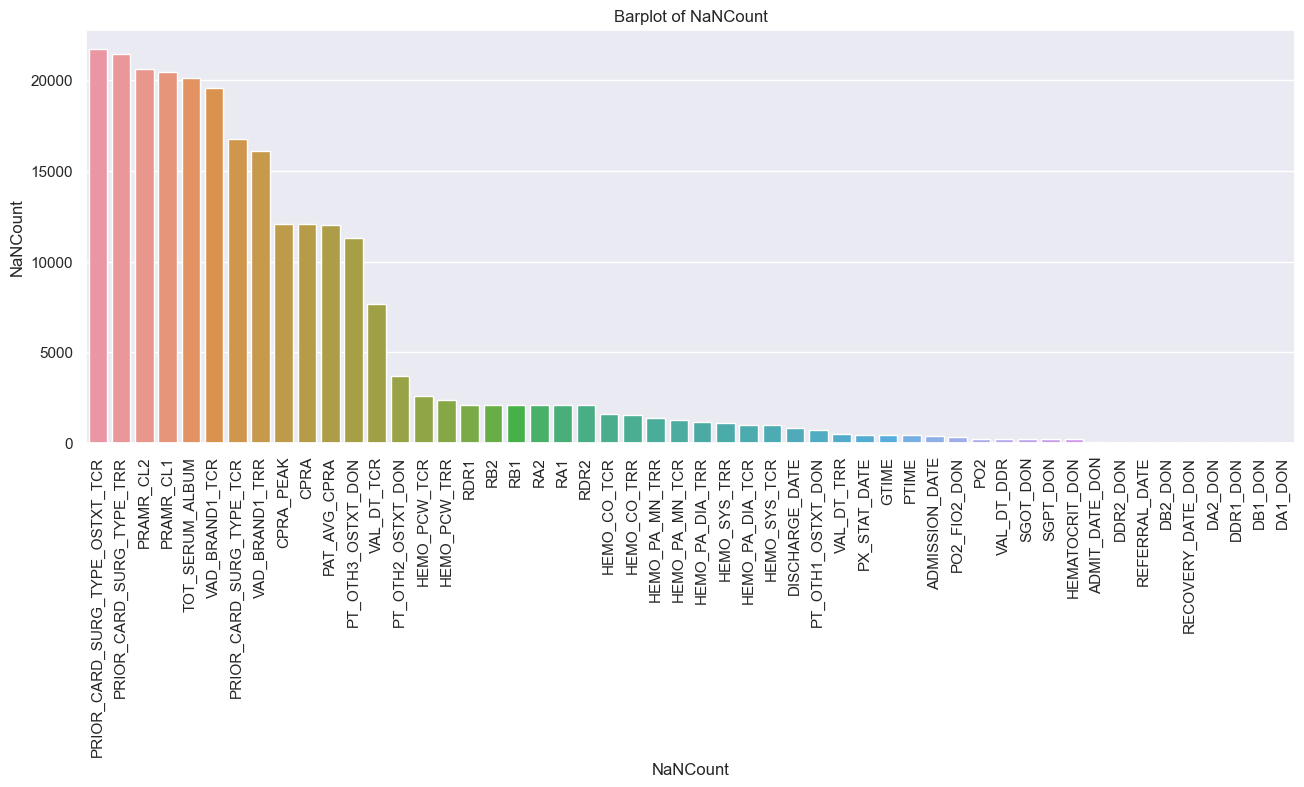

In [20]:
# NaN counts
NaNDf = percentageNull(df)
# columns
cols = ['NaNCount']
# plot
plotBar(NaNDf, cols, width=50, height=20, angle=True)

In [21]:
# list NaNs> than 10K
NaNDf[NaNDf.NaNCount >= 10_000]

,percentage,NaNCount
PRIOR_CARD_SURG_TYPE_OSTXT_TCR,21.128246,21685
PRIOR_CARD_SURG_TYPE_TRR,22.070270,21426
PRAMR_CL2,25.100022,20593
PRAMR_CL1,25.561941,20466
TOT_SERUM_ALBUM,26.794937,20127
VAD_BRAND1_TCR,28.813559,19572
PRIOR_CARD_SURG_TYPE_TCR,39.135811,16734
VAD_BRAND1_TRR,41.430858,16103
CPRA_PEAK,56.161344,12053
CPRA,56.204990,12041


In [22]:
# determine year & counts
df.TX_YEAR.value_counts()

TX_YEAR
2021    3325
2020    3191
2019    3040
2018    2933
2017    2795
2016    2721
2015    2318
2014    2191
2013    2047
2012    1774
2011    1159
Name: count, dtype: int64

In [23]:
# last five years
df_5 = df[df.TX_YEAR > 2016]
# shape
df_5.shape

(15284, 281)

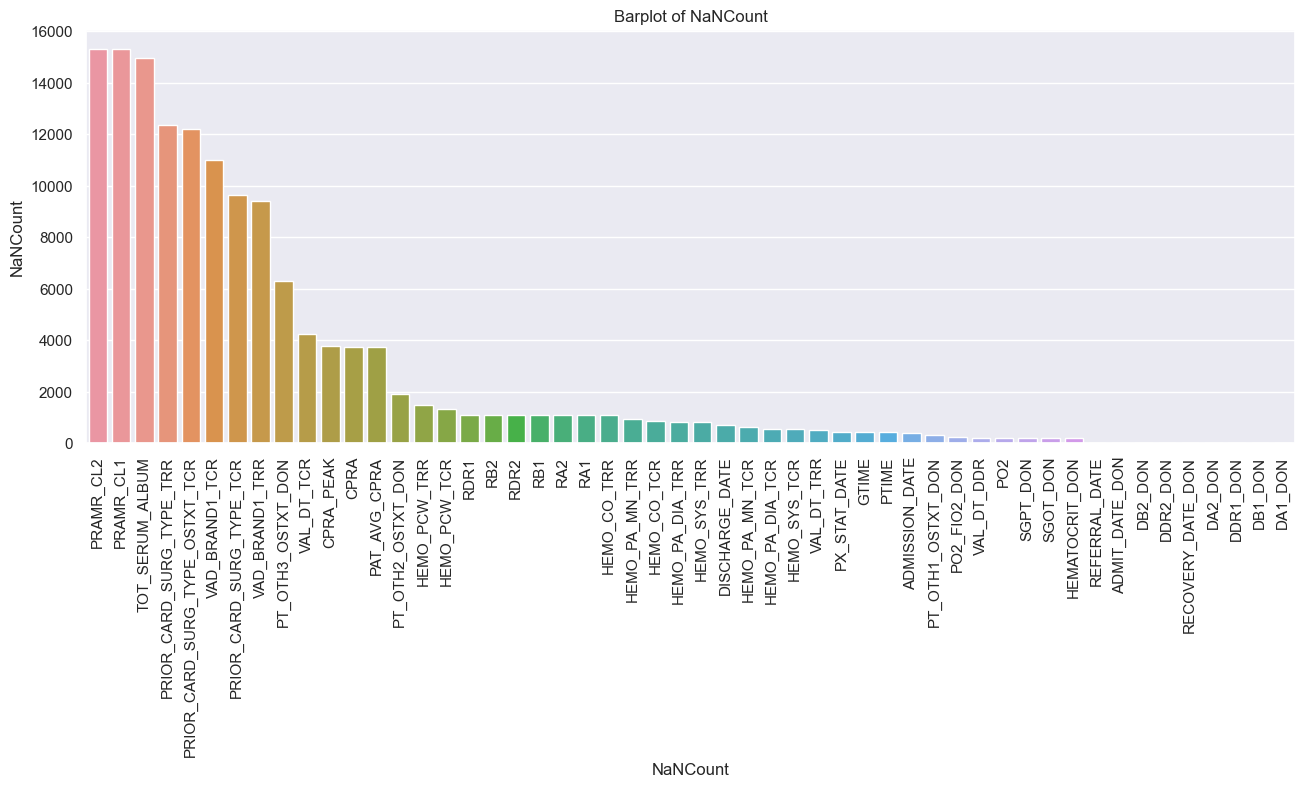

In [24]:
# count NaNs
NaN_5 = percentageNull(df_5)
# columns
cols = ['NaNCount']
# plot
plotBar(NaN_5, cols, width=50, height=20, angle=True)

In [25]:
# display
NaN_5[NaN_5.NaNCount >= 5_000]

,percentage,NaNCount
PRAMR_CL2,0.000000,15284
PRAMR_CL1,0.000000,15284
TOT_SERUM_ALBUM,2.146035,14956
PRIOR_CARD_SURG_TYPE_TRR,19.268516,12339
PRIOR_CARD_SURG_TYPE_OSTXT_TCR,20.223763,12193
VAD_BRAND1_TCR,28.081654,10992
PRIOR_CARD_SURG_TYPE_TCR,37.025648,9625
VAD_BRAND1_TRR,38.497775,9400
PT_OTH3_OSTXT_DON,58.800052,6297


#### Excessive Missing Data 

In [26]:
# remove features
removeCols = ['TX_YEAR', 'PRAMR_CL2','PRAMR_CL1', 'TOT_SERUM_ALBUM', 'PRIOR_CARD_SURG_TYPE_TRR', 'PRIOR_CARD_SURG_TYPE_OSTXT_TCR', 
              'VAD_BRAND1_TCR', 'PRIOR_CARD_SURG_TYPE_TCR','VAD_BRAND1_TRR', 'PT_OTH3_OSTXT_DON']

# describe columns to be removed
df_5[removeCols].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TX_YEAR,15284.0,NaN,NaN,NaN,2019.086234,1.412462,2017.0,2018.0,2019.0,2020.0,2021.0
PRAMR_CL2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRAMR_CL1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOT_SERUM_ALBUM,328.0,NaN,NaN,NaN,3.841768,0.686162,1.0,3.6,3.9,4.3,5.4
PRIOR_CARD_SURG_TYPE_TRR,2945.0,NaN,NaN,NaN,11.893379,6.528796,1.0,4.0,16.0,16.0,24.0
PRIOR_CARD_SURG_TYPE_OSTXT_TCR,3091,913,LVAD,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VAD_BRAND1_TCR,4292.0,NaN,NaN,NaN,315.819897,252.488917,205.0,205.0,224.0,236.0,999.0
PRIOR_CARD_SURG_TYPE_TCR,5659.0,NaN,NaN,NaN,9.854568,7.193032,1.0,2.0,16.0,16.0,26.0
VAD_BRAND1_TRR,5884.0,NaN,NaN,NaN,298.532631,227.16178,205.0,205.0,224.0,236.0,999.0
PT_OTH3_OSTXT_DON,8987,3857,ROCURONIUM,601,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# shape
df_5.shape

(15284, 281)

### Remove

In [28]:
# remove
df_5 = df_5.drop(columns=removeCols)

# shape
df_5.shape

(15284, 271)

In [29]:
# removed column description
dfColDef.iloc[:,:2][dfColDef.featureName.str.contains('|'.join(removeCols))]

,featureName,desc
201,PRAMR_CL1,RECIPIENT MOST RECENT PRA% CLASS I @ TRANSPLANT
202,PRAMR_CL2,RECIPIENT MOST RECENT PRA% CLASS II @ TRANSPLANT
207,PRIOR_CARD_SURG_TYPE_OSTXT_TCR,TCR PRIOR CARDIAC SURGERY TYPE OTHER SPECIFIED AT LISTING (NON-TRANSPLANT)
208,PRIOR_CARD_SURG_TYPE_TCR,TRR PRIOR CARDIAC SURGERY TYPE AT LISTING (NON-TRANSPLANT)
209,PRIOR_CARD_SURG_TYPE_TRR,TRR CARDIAC SURGERY TYPE BETWEEN LISTING AND TRANSPLANT (NON-TRANSPLANT)
224,PT_OTH3_OSTXT_DON,DECEASED DONOR-OTHER MEDS B/N BRAIN DEATH W/IN 24 HRS OF PROCUREMENT #3
256,TOT_SERUM_ALBUM,PATIENT TOTAL SERUM ALBUMIN @ REGISTRATION (pre 1/1/2007 for adult)
263,TX_YEAR,TRANSPLANT YEAR
265,VAD_BRAND1_TCR,CANDIDATE VAD BRAND 1 AT LISTING
266,VAD_BRAND1_TRR,TRR LIFE SUPPORT VAD BRAND 1


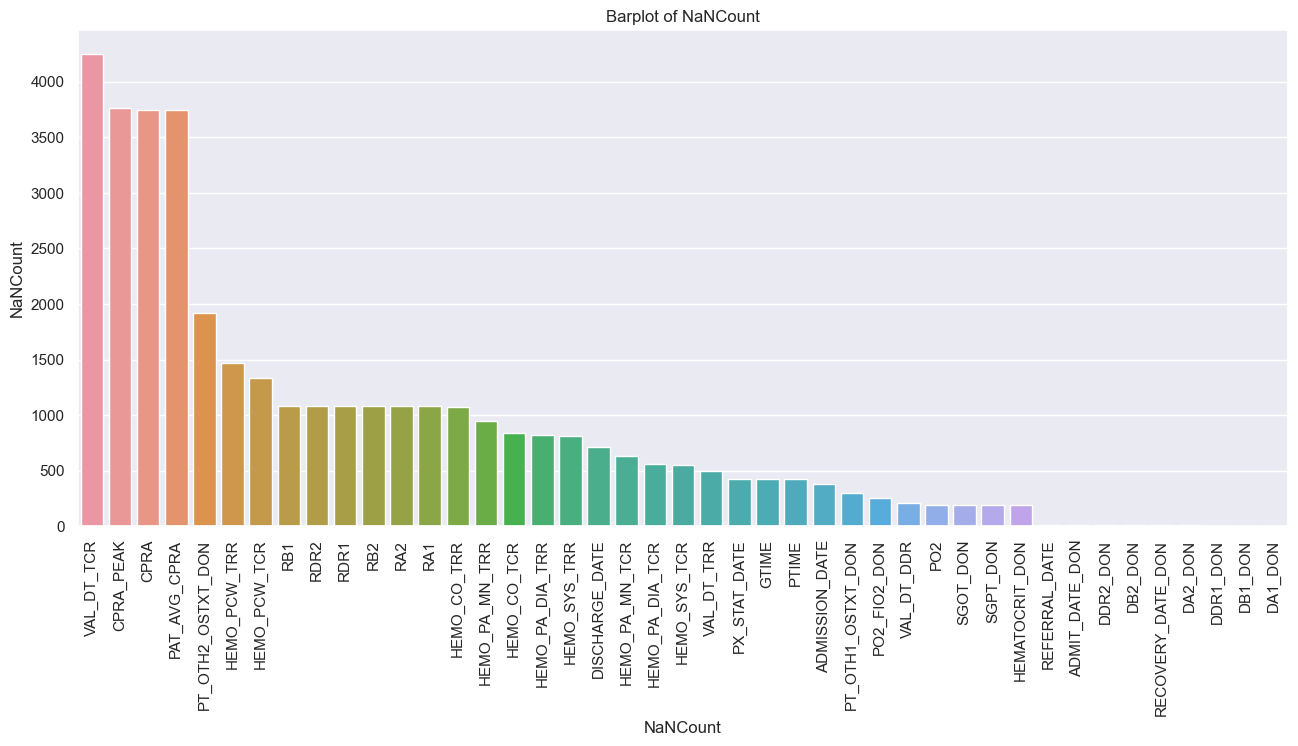

In [30]:
# count NaNs from new dataframe
NaN_5 = percentageNull(df_5)
# columns
cols = ['NaNCount']
# plot
plotBar(NaN_5, cols, width=50, height=20, angle=True)

In [31]:
# missing data column description
dfColDef[dfColDef.featureName.str.contains('|'.join(NaN_5.index))]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
5,ADMISSION_DATE,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,1999-10-25 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown
6,ADMIT_DATE_DON,DONOR ADMIT DATE,DDR,2006-04-26 00:00:00,Unknown,DONOR INFORMATION,NUM,DON ADMIT DATE,Unknown
46,DA1_DON,DONOR A1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A1 ANTIGEN,Unknown
47,DA2_DON,DONOR A2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A2 ANTIGEN,Unknown
58,DB1_DON,DONOR B1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B1 ANTIGEN,Unknown
59,DB2_DON,DONOR B2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B2 ANTIGEN,Unknown
61,DDR1_DON,DONOR DR1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR1 ANTIGEN,Unknown
62,DDR2_DON,DONOR DR2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR DR2 ANTIGEN,Unknown
71,DISCHARGE_DATE,RECIPIENT DISCHARGE DATE FROM TX CENTER,TRR,1994-04-01 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF DISCHARGE FROM TX CENTER,Unknown
107,GTIME,GRAFT LIFESPAN-Days From Transplant to Failure/Death/Last Follow-Up,CALCULATED,Unknown,Unknown,Unknown,NUM,FOLLDATE - TX_DATE,Unknown


### Examine `DATE` Features

In [32]:
# display descriptions
dateCols = df_5.columns[df_5.columns.str.contains('DATE')].values

# datecolumn description
dfColDef[dfColDef.featureName.str.contains('|'.join(dateCols))]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
3,ACTIVATE_DATE,ALLOCATION TIME BEGINNING DATE,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,WL LISTING BACK DATE,Unknown
5,ADMISSION_DATE,RECIPIENT DATE OF ADMISSION TO TX CENTER,TRR,1999-10-25 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF ADMISSION TO TX CENTER,Unknown
6,ADMIT_DATE_DON,DONOR ADMIT DATE,DDR,2006-04-26 00:00:00,Unknown,DONOR INFORMATION,NUM,DON ADMIT DATE,Unknown
71,DISCHARGE_DATE,RECIPIENT DISCHARGE DATE FROM TX CENTER,TRR,1994-04-01 00:00:00,Unknown,PATIENT STATUS,NUM,TRR DATE OF DISCHARGE FROM TX CENTER,Unknown
92,END_DATE,"EARLIEST OF DATES OF REMOVAL FROM WAITING LIST, TRANSPLANT, DEATH, OR TIME COPY OF DATA CREATED",WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,ENDING DATE FOR REGISTRATION,"IF PATIENT TRANSPLANTED OR DIED, BUT WAS REMOVED AFTER THE EVENT, END_DATE IS BACKDATED TO GIVE THE DATE OF EVENT"
152,INIT_DATE,BEGINNING DATE FOR REGISTRATION,WAITING LIST DATA,1987-10-01 00:00:00,Unknown,WAITING LIST DATA,NUM,BEGINNING DATE FOR REGISTRATION,Unknown
231,PX_STAT_DATE,RECIPIENT STATUS DATE,TRR/TRF-CALCULATED,1987-10-02 00:00:00,Unknown,PATIENT STATUS,NUM,"DATE OF DEATH, RE-TX OR LAST FOLLOW-UP",Unknown
238,RECOVERY_DATE_DON,ORGAN RECOVERY DATE,DDR / LDR,1987-10-01 00:00:00,Unknown,ORGAN RECOVERY,NUM,RECOVERY DATE (SENT TO OR),Unknown
240,REFERRAL_DATE,DATE OF REFERRAL CALL,DDR,1994-04-01 00:00:00,Unknown,PROVIDER INFORMATION,NUM,DDR DATE OF REFERRAL CALL,Unknown
261,TX_DATE,TRANSPLANT DATE,TRR,1987-10-01 00:00:00,Unknown,RECIPIENT INFORMATION,NUM,TRR TRANSPLANT DATE,Unknown


In [33]:
# full dataframe
df.to_pickle("../Data/cleanD.pkl")

# cleaned dataframe save to pickle file
df_5.to_pickle("../Data/cleanDF_5_years.pkl")

# save to pickle file
dfColDef.to_pickle("../Data/columnDefinition.pkl")

In [36]:
# import Column description
colDef = pd.read_csv("../data/thoraticColumnNames.csv")

# current columns array
dfColumns = pd.DataFrame(np.sort(df.columns.values), columns= ['featureName'])

In [37]:
# display head
colDef.sample(10)

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
500,VAD_BRAND1_TRR,TRR LIFE SUPPORT VAD BRAND 1,TRR,2004-06-30 00:00:00,Unknown,PATIENT STATUS,NUM,TRR VAD BRAND 1,Unknown
20,ARGININE_DON,DECEASED DONOR-WAS DONOR GIVEN ARGININE VASOPRESSIN WITHIN 24 HRS PRE CROSS CLAMP?,DDR,2004-06-30 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DDR:Arginine Vasopressin:,Unknown
182,FUNC_STAT_TRF,RECIPIENT FUNCTIONAL STATUS-MOST RECENT AT FOLLOW-UP,TRF,1997-04-01 00:00:00,Unknown,PATIENT STATUS AT TIME OF FOLLOW-UP,NUM,FUNCTIONAL STATUS AT MOST RECENT FOLLOW-UP,Unknown
531,WL_ORG,ORGAN LISTED FOR,WL DATA,1987-10-01 00:00:00,Unknown,Unknown,CHAR,WL Desired Organ,Unknown
510,VAD_TAH_TRR,RECIPIENT ON LIFE SUPPORT - VAD/TAH @ TRANSPLANT,TRR,1994-04-01 00:00:00,2004-06-30 00:00:00,PATIENT STATUS,NUM,TRR VAD,Unknown
150,EBV_IGM_CAD_DON,DECEASED DONOR EPSTEIN BARR VIRUS BY IGM TEST RESULT,DDR,2006-05-03 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DDR: EBV//IGM,Unknown
461,TCR_CDC_GROWTH_WGT,CANDIDATE CDC WGT PERCENTILE AT LISTING,TCR,2004-06-30 00:00:00,Unknown,CLINICAL INFORMATION,NUM,TCR PEDIATRIC GROWTH PERCENTILE: WGT,Unknown
155,ECMO_72HOURS,Recipient ECMO at 72 Hours,TRR,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,TRR ECMO at 72 Hours,Unknown
376,PRETREAT_MED_DON_OLD,DECEASED DONOR PRE-RECOVERY MEDICATION(S) FROM BRAIN DEATH TO 24 HRS PRIOR TO PROCUREMENT,DDR,1994-04-01 00:00:00,2003-01-27 00:00:00,CLINICAL INFORMATION,CHAR,DDR PRERECOVERY MEDICATION (Y/N),Unknown
273,INO_PROCURE_AGENT_3,DECEASED DONOR-INOTROPIC MEDICATION AGENT 3,DDR,2003-01-27 00:00:00,Unknown,CLINICAL INFORMATION,NUM,"DDR INOTROPIC AGENT 3, AT PROCUREMENT",Unknown


In [38]:
# display
dfColumns.sample(10)

,featureName
199,PO2_DONE_DON
5,ADMISSION_DATE
278,WGT_KG_DON_CALC
209,PRIOR_CARD_SURG_TYPE_TRR
137,HIST_HYPERTENS_DON
110,HBV_CORE_DON
61,DDR1_DON
88,ECMO_TCR
115,HBV_SUR_ANTIGEN_DON
259,TRTREJ1Y


In [39]:
dfColumns.shape

(281, 1)

In [40]:
selectName = ['CARDARREST_NEURO', 'DA1', 'DA2', 'DB1', 'DB2', 'HIST_MI', 'LV_EJECT', 'LV_EJECT_METH', 'CPRA', 
              'INIT_BMI_CALC', 'INIT_HGT_CM_CALC', 'INIT_WGT_KG_CALC', 'TATTOOS']

# colDef[colDef['featureName'].isin(selectName)]

colDef[colDef['featureName'].str.contains('|'.join(selectName))]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CARDARREST_NEURO,DECEASED DONOR-CARDIAC ARREST POST BRAIN DEATH,DDR,1999-10-25 00:00:00,Unknown,CLINICAL INFORMATION,CHAR,DON CARDIAC ARR. SINCE EVENT THAT LED TO DECL OF DEATH,Unknown
84,CPRA,Recipient Most Recent CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Most Recent CPRA,Unknown
85,CPRA_PEAK,RecipientPeak CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Peak CPRA,Unknown
94,DA1,DONOR A1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A1 ANTIGEN,Unknown
95,DA2,DONOR A2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR A2 ANTIGEN,Unknown
110,DB1,DONOR B1 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B1 ANTIGEN,Unknown
111,DB2,DONOR B2 ANTIGEN,CALCULATED,1987-10-01 00:00:00,Unknown,DONOR CENTER HISTOCOMPATIBILITY TYPING,NUM,COMPUTED DONOR B2 ANTIGEN,Unknown
235,HIST_MI,DECEASED DONOR HISTORY OF PREVIOUS MI (MYOCARDIAL INFARCTION),DDR,1999-10-25 00:00:00,Unknown,HEART DONOR'S CARDIAC FUNCTION,CHAR,DON HISTORY OF PREVIOUS MI,Unknown
258,INIT_BMI_CALC,Calculated Candidate BMI at Listing,CALCULATED,Unknown,Unknown,Unknown,NUM,Calculated Candidate BMI at Listing,Unknown
262,INIT_HGT_CM_CALC,Calculated Candidate Height in CM at Listing,CALCULATED,Unknown,Unknown,Unknown,NUM,Calculated Candidate Height in CM at Listing,Unknown


In [41]:
dfColumns[dfColumns['featureName'].str.contains('|'.join(selectName))]

,featureName
25,CARDARREST_NEURO_DON
41,CPRA
42,CPRA_PEAK
46,DA1_DON
47,DA2_DON
58,DB1_DON
59,DB2_DON
138,HIST_MI_DON
177,LV_EJECT_DON
178,LV_EJECT_METH_DON


In [42]:
# map
name_map = {'CARDARREST_NEURO':'CARDARREST_NEURO_DON', 'DA1': 'DA1_DON', 'DA2': 'DA2_DON', 'HIST_MI': 'HIST_MI_DON', 'LV_EJECT': 'LV_EJECT_DON', 
            'DB1':'DB1_DON', 'DB2':'DB2_DON', 'LV_EJECT_METH':'LV_EJECT_METH_DON','INIT_BMI_CALC':'PAT_BMI', 'INIT_HGT_CM_CALC':'PAT_HGT_CM', 
            'INIT_WGT_KG_CALC':'PAT_WGT_KG', 'TATTOOS':'TATTOOS_DON', 'CPRA': 'PAT_AVG_CPRA'}

# Update the featureName column based on the mapping dictionary
colDef['featureName'] = colDef['featureName'].replace(name_map)

In [43]:
# join two DataFrames
dfColDef = pd.merge(colDef, dfColumns, how='right', on='featureName')

# display features in current DataFrame NOT in colDef 
dfColDef[dfColDef.desc.isna()]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CPRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,DDR1_DON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,DDR2_DON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dfColDef[dfColDef.featureName.str.contains('CPRA')]

,featureName,desc,form,varStartDate,VarEndDate,formSection,dataType,labelSAS,COMMENT
41,CPRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,CPRA_PEAK,RecipientPeak CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Peak CPRA,Unknown
188,PAT_AVG_CPRA,Recipient Most Recent CPRA,RH,2015-03-31 00:00:00,Unknown,CLINICAL INFORMATION,NUM,RH Most Recent CPRA,Unknown


In [45]:
# indeces to delete
idx_delete = [41, 42]

# delete rows
dfColDef = dfColDef.drop(index=idx_delete) 

In [46]:
dfColDef.shape

(279, 9)

In [47]:
# write the data dictionary DataFrame to a pickle file
dfColDef.to_pickle("../Data/df_data_dictionary.pkl")

In [48]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer